# Bipolar junction transistor

The term "transistor" originated in 1951 at Bell Laboratories by Dr. Shockley and associates. A Bipolar Junction Transistor (BJT) is a type of transistor that uses both electron and hole charge carriers. It consists of three parts: the emitter (heavily doped with N-type), the base (narrow and slightly doped), and the collector (similar semiconductor as the emitter). BJTs operate in three regions: the active region (used as an amplifier with IC = βIB), the saturation region (both junctions forward-biased with IC = I(saturation)), and the cut-off region (both junctions reverse-biased with no current flow, IC = 0).

![BJT_npn](../Circuit_Electronics/CircuitElectronicsImages/BJT1_1.PNG)

 There are two types of BJTs, NPN and PNP, which differ in the arrangement of these layers. BJTs are widely used for amplification and switching applications due to their ability to control a large current with a smaller base current.

 ![HowitsworkBJT](../Circuit_Electronics/CircuitElectronicsImages/Transistor_animation.gif)

BJTs are classified into PNP and NPN types based on the arrangement of p-type and n-type semiconductor materials. 

## NPN transistor

In an NPN transistor, a p-type material is between two n-type semiconductors acting as emitter and collector, with the emitter-base junction forward-biased and the collector-base junction reverse-biased during the forward active state. The emitter-base junction is forward biased if the voltage exceeds the barrier potential (0.3V for germanium, 0.7V for silicon), causing electrons to move from the emitter to the base and creating emitter current. Most electrons do not recombine in the base due to its small width, resulting in a majority of electrons diffusing to the collector and forming the collector current.

![BJT_Bias_NPN](../Circuit_Electronics/CircuitElectronicsImages/BJT_DC_NPN.PNG)

## PNP transistor

In a PNP transistor, current is primarily due to the movement of holes. The emitter-base junction is forward biased, causing holes from the emitter to flow into the base, where a small portion combines with electrons, forming the base current. Most holes diffuse to the collector, generating the collector current, with a minor component due to reverse saturation current.

![PNP1](../Circuit_Electronics/CircuitElectronicsImages/PNP1.PNG)



### Electronic Laboratory: BJT Saturation Region

To obtain the saturation region, we need to bias the input diode (BE) at voltages below 0.6V and use a small VCE.

First, let's determine how to obtain the output characteristics of a transistor. Follow these steps:

- **Set Up the Circuit:** Configure your transistor circuit with the base, collector, and emitter. Ensure you have a method to vary the base current.

- **Perform DC Analysis:** For each base current, conduct a DC analysis by sweeping the collector voltage and recording the collector current.

- **Save and Plot Results:** Save the results for each base current and plot the collector current versus collector voltage.

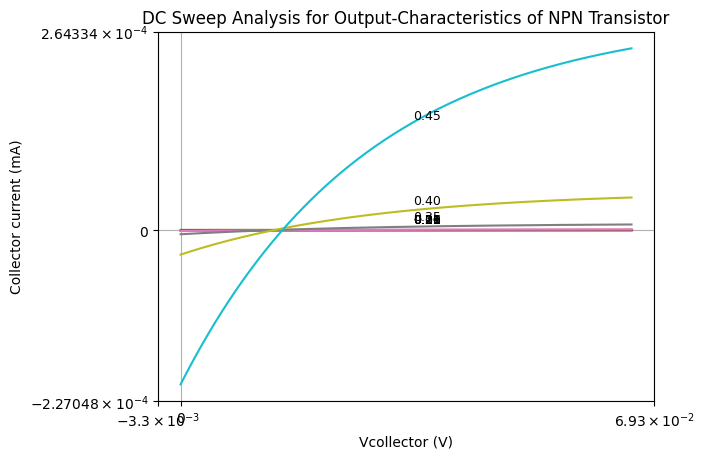

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *




circuit = Circuit('IV_2n2222')

circuit.BJT('1', 'collector', 'base', circuit.gnd, model='2n2222a')

# .MODEL 2n2222a npn
circuit.model('2n2222a', 'BJT', IS=3.88184e-14, BF=929.846, NF=1.10496, VAF=16.5003,
IKF=0.019539, ISE=1.0168e-11, NE=1.94752, BR=48.4545,
NR=1.07004, VAR=40.538, IKR=0.19539, ISC=1.0168e-11,
NC=4, RB=0.1, IRB=0.1, RBM=0.1,
RE=0.0001, RC=0.426673, XTB=0.1, XTI=1,
EG=1.05, CJE=2.23677e-11, VJE=0.582701, MJE=0.63466,
TF=4.06711e-10, XTF=3.92912, VTF=17712.6, ITF=0.4334,
CJC=2.23943e-11, VJC=0.576146, MJC=0.632796, XCJC=1,
FC=0.170253, CJS=0, VJS=0.75, MJS=0.5,
TR=1e-07, PTF=0, KF=0, AF=1
                   )

# Define sweep parameters
VAF=16.5003
Vinput_start = 0.0
Vinput_stop = VAF*0.004
Vinput_step = 0.0001

Vbase=circuit.V('input', '1', circuit.gnd, 0.45)
circuit.V('measin', '1', 'base', 0)
circuit.V('output', '3', circuit.gnd, 5)
circuit.V('measout', '3', 'collector', 0)

# Base voltage values to iterate through
# Generate base voltages with exponential steps for the first part and linear steps for the second part
# exp_start = 0.01
# exp_stop = 0.41
lin_start = 0.01
lin_stop = 0.45

# Number of steps
#exp_steps = 20
lin_steps = 10

# Exponential part
#exp_base_voltages = np.geomspace(exp_start, exp_stop, num=exp_steps)

# Linear part
lin_base_voltages = np.linspace(lin_start, lin_stop, num=lin_steps)

# Combine both parts
#base_voltages = np.concatenate((exp_base_voltages, lin_base_voltages))
base_voltages = lin_base_voltages


#base_voltages = np.linspace(0.1, 0.5, num=20)  # Adjust 'num' as needed

# Store results for plotting
collector_voltages = []
collector_currents = []
labels = []

# Loop through base voltage values
for Vbase_value in base_voltages:
    Vbase.dc_value = Vbase_value
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Voutput=slice(Vinput_start, Vinput_stop, Vinput_step))
    waveform = analysis['collector']
    InputCurrentMeasurement = analysis['vmeasout']
    
    # Store results
    collector_voltages.append(np.array(waveform))
    collector_currents.append(InputCurrentMeasurement * 1000)  # Convert to mA
    labels.append(f'{Vbase_value:.2f}')  # Format to two decimal places for clarity


# Plot the results
plt.xscale('symlog', linthresh=1)
plt.yscale('symlog', linthresh=1)
for i in range(len(base_voltages)):
    plt.plot(collector_voltages[i], collector_currents[i], label=labels[i])
    # Annotate each curve with its label
    midpoint_index = len(collector_voltages[i]) // 2
    plt.annotate(labels[i], xy=(collector_voltages[i][midpoint_index], collector_currents[i][midpoint_index]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9, color='black')

plt.xlabel('Vcollector (V)')
plt.ylabel('Collector current (mA)')
plt.title('DC Sweep Analysis for Output-Characteristics of NPN Transistor')
plt.grid(True)
#plt.legend()
plt.show()


### Electronic Labratory : BJT Active region

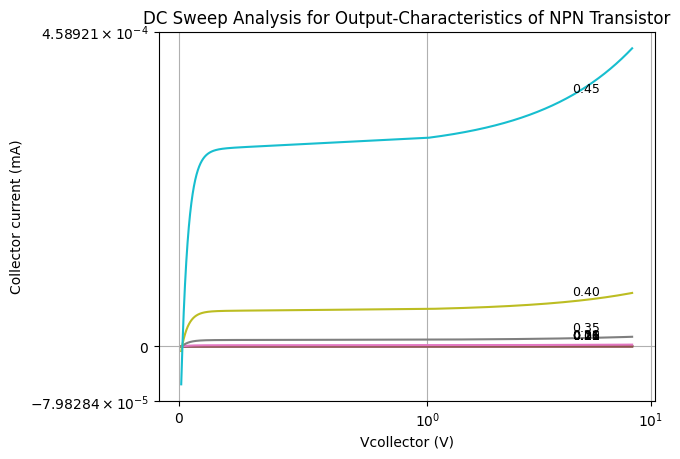

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *




circuit = Circuit('IV_2n2222')

circuit.BJT('1', 'collector', 'base', circuit.gnd, model='2n2222a')

# .MODEL 2n2222a npn
circuit.model('2n2222a', 'BJT', IS=3.88184e-14, BF=929.846, NF=1.10496, VAF=16.5003,
IKF=0.019539, ISE=1.0168e-11, NE=1.94752, BR=48.4545,
NR=1.07004, VAR=40.538, IKR=0.19539, ISC=1.0168e-11,
NC=4, RB=0.1, IRB=0.1, RBM=0.1,
RE=0.0001, RC=0.426673, XTB=0.1, XTI=1,
EG=1.05, CJE=2.23677e-11, VJE=0.582701, MJE=0.63466,
TF=4.06711e-10, XTF=3.92912, VTF=17712.6, ITF=0.4334,
CJC=2.23943e-11, VJC=0.576146, MJC=0.632796, XCJC=1,
FC=0.170253, CJS=0, VJS=0.75, MJS=0.5,
TR=1e-07, PTF=0, KF=0, AF=1
                   )

# Define sweep parameters
VAF=16.5003
Vinput_start = 0.01
Vinput_stop = VAF*0.5
Vinput_step = 0.0001


circuit.V('measin', '1', 'base', 0)
circuit.V('output', '3', circuit.gnd, 5)
circuit.V('measout', '3', 'collector', 0)
Vbase=circuit.V('input', '1', circuit.gnd, 0.45)


# Base voltage values to iterate through
# Generate base voltages with exponential steps for the first part and linear steps for the second part
# exp_start = 0.01
# exp_stop = 0.41
lin_start = 0.01
lin_stop = 0.45

# Number of steps
#exp_steps = 20
lin_steps = 10

# Exponential part
#exp_base_voltages = np.geomspace(exp_start, exp_stop, num=exp_steps)

# Linear part
lin_base_voltages = np.linspace(lin_start, lin_stop, num=lin_steps)

# Combine both parts
#base_voltages = np.concatenate((exp_base_voltages, lin_base_voltages))
base_voltages = lin_base_voltages


#base_voltages = np.linspace(0.1, 0.5, num=20)  # Adjust 'num' as needed

# Store results for plotting
collector_voltages = []
collector_currents = []
labels = []

# Loop through base voltage values
for Vbase_value in base_voltages:
    Vbase.dc_value = Vbase_value
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Voutput=slice(Vinput_start, Vinput_stop, Vinput_step))
    waveform = analysis['collector']
    InputCurrentMeasurement = analysis['vmeasout']
    
    # Store results
    collector_voltages.append(np.array(waveform))
    collector_currents.append(InputCurrentMeasurement * 1000)  # Convert to mA
    labels.append(f'{Vbase_value:.2f}')  # Format to two decimal places for clarity


# Plot the results
plt.xscale('symlog', linthresh=1)
plt.yscale('symlog', linthresh=1)
for i in range(len(base_voltages)):
    plt.plot(collector_voltages[i], collector_currents[i], label=labels[i])
    # Annotate each curve with its label
    midpoint_index = len(collector_voltages[i]) // 2
    plt.annotate(labels[i], xy=(collector_voltages[i][midpoint_index], collector_currents[i][midpoint_index]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9, color='black')

plt.xlabel('Vcollector (V)')
plt.ylabel('Collector current (mA)')
plt.title('DC Sweep Analysis for Output-Characteristics of NPN Transistor')
plt.grid(True)
#plt.legend()
plt.show()


## Conclusion of our experiments

In our experiments in the electronics laboratory using Python and SPICE (PySpice), we understood the following concepts:

- The bias of the $ V_\text{BE} $ input junction is crucial for transistor conduction. When $  V_\text{BE} $ is high, it results in a larger $ I_\text{Base} $ , which increases $ I_\text{Collector} $. As a result, the voltage drop across other elements decreases, and $ V_\text{CE} $ becomes small, leading to transistor saturation.

- When the $ V_\text{BE} $ bias is lower, such as 0.5V, the I_Base is smaller, and $ I_\text{Emitter} $ or $ I_\text{Collector} $ remains normal. In this case, $ V_\text{BE} $ is approximately $ V_\text{CC}}{2} $. This configuration yields suitable operating points for the output transistor and ensures that the transistor operates in the active region for optimal performance.

## Biasing BJT

### Important Algorithm for Bias analysis

**Step 1: Assumption and Calculation**
- **Assumption**: Assume the operating point is in the Active region.
- **Calculation**: Use the formula $ I_C = \beta I_B $ to solve the problem.

**Step 2: Verification and Adjustment**
- **Check**: Verify if $ V_\text{CE} $ is greater than 1 volt.
  - **If True**: The assumption of the Active region is correct; proceed with DC analysis.
  - **If False**: The operating point might be in the Saturation region. In this case, use $ I_E = I_C + I_B $ instead of $ I_C = \beta I_B $ and complete the DC analysis with this adjustment.

### Fixed-Bias Circuit and DC Analysis

The fixed-bias circuit described is a basic configuration for transistor DC biasing, applicable to both NPN and PNP transistors by adjusting current directions and voltage polarities. For DC analysis, capacitors are replaced with **open circuits** because their reactance depends on frequency. 

The DC supply, $ V_{CC} $, can be split into two supplies to analyze input and output circuits separately, reducing interaction between them to the base current $ I_B $. The base-emitter loop is analyzed using Kirchhoff’s voltage law, yielding:

$$
V_{CC} - I_B R_B - V_{BE} = 0
$$

Solving for $ I_B $ gives:

$$
I_B = \frac{V_{CC} - V_{BE}}{R_B}
$$

where $ V_{CC} $ and $ V_{BE} $ are constants, and $ R_B $ determines $ I_B $.

### Collector-Emitter Loop and Voltage Measurements

In the collector-emitter loop, the collector current $ I_C $ is related to $ I_B $ by:

$$
I_C = \beta I_B
$$

where $ \beta $ is the current gain. The voltage across the collector-emitter junction, $ V_{CE} $, is given by:

$$
V_{CE} = V_{CC} - I_C R_C
$$

Here, $ V_{CE} $ represents the voltage from collector to emitter. Voltage measurements are taken by placing the positive lead of the voltmeter at the collector terminal and the negative lead at the emitter terminal. The difference between $ V_C $ (voltage from collector to ground) and $ V_{CE} $ is significant for troubleshooting transistor circuits.

![Fix_Bias_Circuit1](../Circuit_Electronics/CircuitElectronicsImages/Fix_Bias_Circuit.PNG)


## Load-Line Analysis

As we know Load-Line Analysis for Diode Networks Involves plotting the diode's actual characteristics along with the network equation. The intersection of these plots defines the network's operating conditions.

**Load-Line Analysis for BJT Networks**:
Similar approach as with diodes, using the BJT's characteristics. For a fixed-bias configuration, the load resistor $ R_C $ determines the slope of the network equation.A smaller load resistance results in a steeper slope. The network equation is $ V_{CE} = V_{CC} - I_C R_C $. The output characteristics of the transistor plot $ I_C $ versus $ V_{CE} $. Using two points to plot the straight line defined by the network equation, such as when $ I_C = 0 $ mA, $ V_{CE} = V_{CC} $. This method allows for determining the operating point by finding where the network equation intersects with the device characteristics.

![Fix_Bias_Circuit_Load_Line](../Circuit_Electronics/CircuitElectronicsImages/Fix_Bias_Circuit_Load_Line.PNG)

Following figures shows Effect of Network over Operating Point in Fix Bias circuit.
By joining the two points defined by above Equations, we can draw the straight line established by  $ V_{CE} = V_{CC} - I_C R_C $. The resulting line on the graph is called the load line because it is defined by the load resistor $ R_C $. By solving for the resulting level of $ I_B $, we can establish the actual Q-point.

If the level of $ I_B $ is changed by varying the value of $ R_B $, the Q-point moves up or down the load line for increasing values of $ I_B $. If $ V_{CC} $ is held fixed and $ R_C $ is increased, the load line will shift. If $ I_B $ is held fixed, the Q-point will move accordingly. If $ R_C $ is fixed and $ V_{CC} $ decreased, the load line shifts again.

![EffectofNetwork_FixBias_OperatingPoint](../Circuit_Electronics/CircuitElectronicsImages/EffectofNetwork_FixBias_OperatingPoint.png)



## Emitter Bias Configuration

Writing Kirchhoff’s voltage law around the base–emitter loop of the network in the following Figure. 

$$
+V_{CC} - I_B R_B - V_{BE} - I_E R_E = 0
$$

$$
I_E = (\beta + 1) I_B
$$

Substituting for $ I_E $ in Eq. (4.15) results in:

$$
V_{CC} - I_B R_B - V_{BE} - (\beta + 1) I_B R_E = 0
$$

Grouping terms then provides the following:

$$
-I_B (R_B + (\beta + 1) R_E) + V_{CC} - V_{BE} = 0
$$

Multiplying through by $-1$, we have:

$$ I_B (R_B + (\beta + 1) R_E) - V_{CC} + V_{BE} = 0 $$

Therefore:

$$ I_B (R_B + (\beta + 1) R_E) = V_{CC} - V_{BE} $$

Solving for $ I_B $ gives:

$$ I_B = \frac{V_{CC} - V_{BE}}{R_B + (\beta + 1) R_E} $$

Note that the only difference between this equation for $ I_B $ and that obtained for the fixed bias configuration is the term $(\beta + 1) R_E$.

Note that aside from the base-to-emitter voltage $ V_{BE} $, the resistor $ R_E $ is reflected back to the input base circuit by a factor $(\beta + 1)$. In other words, the emitter resistor, which is part of the collector–emitter loop, “appears as” $(\beta + 1) R_E$ in the base–emitter loop. Because $\beta$ is typically 50 or more, the emitter resistor appears to be a great deal larger in the base circuit. 

$$
R_i = (\beta + 1) R_E
$$

![EmitterBiasConfiguration](../Circuit_Electronics/CircuitElectronicsImages/EmitterBiasConfiguration1.PNG)

## Voltage Divider Bias Configuration

The voltage-divider bias configuration is designed to minimize dependence on the transistor's beta, making the operating point $ I_{CQ} $ and $ V_{CEQ} $ almost independent of beta if circuit parameters are properly chosen. 

![SelfBias_VoltageDeviderBias](../Circuit_Electronics/CircuitElectronicsImages/SelfBias_VoltageDeviderBias.png)

### Homework: Controlled Feedback Configuration
Solve following example. 

![Controlled Feedback Configuration](../Circuit_Electronics/CircuitElectronicsImages/ControlledFeedback.png)

## Common-collecter (emitter-follower) configuration

![emitter-follower](../Circuit_Electronics/CircuitElectronicsImages/emitter_follower.PNG)


## Multiple BJT

### RC coupling

This section covers multi-stage BJT networks, demonstrating how previous methods can be applied to more complex configurations. The R–C coupling method, commonly used, involves feeding the collector output of one stage into the base of the next stage using a coupling capacitor to block DC and pass AC signals. By substituting open-circuit equivalents for capacitors, each stage can be analyzed separately without affecting the others.

![MultiStageCoupling_RC](../Circuit_Electronics/CircuitElectronicsImages/MultiStageCoupling_RC.PNG)

### Darlington

The Darlington configuration in the following Figure, feeds the output of one stage directly into the input of the next, resulting in an AC gain close to 1 with high input impedance, making it suitable for amplifiers with high internal resistance sources. Adding a load resistor to the collector leg and taking the output from the collector terminal would provide very high gain.

![Darligton1_1](../Circuit_Electronics/CircuitElectronicsImages/Darligton1.PNG)

## BJT AC analysis

### AC analysis in Fixed-Bias Configuration

![AC_FixBias](../Circuit_Electronics/CircuitElectronicsImages/AC_FixBias.PNG)

![Table_AC_FixBias](../Circuit_Electronics/CircuitElectronicsImages/ACFix_Table.PNG)

### AC analysis in Voltage-Divider Bias Configuration

![AC_SelfBias1](../Circuit_Electronics/CircuitElectronicsImages/AC_SelfBias.PNG)

![Table_ACSelfBias](../Circuit_Electronics/CircuitElectronicsImages/AC_SelfBias_Table.PNG)

### AC analysis in Unbypassed Emitter-Bias Configuration

![AC_UnbypassedEmitterBias](../Circuit_Electronics/CircuitElectronicsImages/UnbypassedEmitterBias.PNG)

![Table_AC_UnbypassedEmitterBias](../Circuit_Electronics/CircuitElectronicsImages/Table_UnbypassedEmitterBias.PNG)

### AC analysis in Emitter Follower Configuration

![AC_EmitterFollower](../Circuit_Electronics/CircuitElectronicsImages/AC_EmitterFollower.png)

### AC analysis in Collector Feedback Configuration

![AC_FeedBack_CollectorBase1](../Circuit_Electronics/CircuitElectronicsImages/AC_FeedBack_CollectorBase.PNG)

### AC analysis in Fixed-Bias Configuration with Load

![AC_FixBiasWithLoad1](../Circuit_Electronics/CircuitElectronicsImages/AC_FixBiasWithLoad.PNG)

#### AC Analysis Voltage-Divider Bias Configuration with Load

![ACAnalysisVoltageDividerBiasConfigurationwithLoad1](../Circuit_Electronics/CircuitElectronicsImages/ACAnalysisVoltageDividerBiasConfigurationwithLoad.PNG)

## Miniproject: Select the desired configuration and complete the following tasks:

- Add the necessary text and relationships for DC and AC solutions.
- Use Schemdraw.
- Use Pyspice.


## Resistor-transistor logic (RTL)

### NOT Gate in RTL

![NOTGateRTL1](../Circuit_Electronics/CircuitElectronicsImages/NOTGateRTL.PNG)

### NOR Gate in RTL

![NORGateRTL1](../Circuit_Electronics/CircuitElectronicsImages/NORGateRTL.PNG)

###  NAND Gate in RTL

![NANDGateRTL](../Circuit_Electronics/CircuitElectronicsImages/NANDGateRTL1.PNG)

